<a href="https://colab.research.google.com/github/jonasgr5/SDS_PHD_2020_JFG/blob/main/Gr%C3%B8nvad_sdsphd20_portfolio_assignments_thursday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio for SDSPhD20 Filled out by Jonas Følsgaard Grønvad

This notebook contains the exercises and assignments to be answered in a portfolio for the PhD course "Social Data Science: An Applied Introduction to Machine Learning" at Aalborg University, November 2020.

Each day of the course you are given an hour to work on a portfolio with the possibility of sparring with the course lecturers. 

You are expected to attempt to solve the various assignments using the methods and tools taught during the course. Answers should be combined into a notebook (fx by adding answers to a copy of this one). 

**Note:** You are not expected to attempt to solve every single assignment. Note the different requirements for each day.

#### How to hand in your portfolio notebooks

You can hand in your portfolio notebooks in two ways:

- Saving your notebooks in a GitHub repository and then sending the repository URL to the course organizer (Kristian Kjelmann)
- Sharing your notebooks directly with the course organizer (Kristian Kjelmann) in Google Colab.

Kristian’s e-mail: kgk@adm.aau.dk

# Portfolio assignments for Thursday

**Requirement:** Work on solutions for the "Trump vs. GPT-2" assignment

## NLP: Trump vs. GPT-2

The site [https://faketrump.ai/](https://faketrump.ai/) WAS an interesting example of AI-powered fake-text generation. They wrote in 2019:

>We built an artificial intelligence model by fine-tuning [GPT-2](https://openai.com/blog/better-language-models/) to generate tweets in the style of Donald Trump’s Twitter account. After seeing the results, we also built a discriminator that can accurately detect fake tweets 77% of the time — think you can beat our classifier? Try it yourself!

Unfortunately, they decided to take down the site and the dataset.

GPT-2 is a neural transformer-based model, that has been announced by OpenAI in February 2019 and created considerable discussion because they decided - in contrast to their earlier policies - not to release the mode to the public. Their central argument was that the model could be used to produce fake news, spam and alike too easily. The footnote of the faketrump page reads: “Generating realistic fake text has become much more accessible. We hope to highlight the current state of text generation to demonstrate how difficult it is to discern fiction from reality.”


Since then several organizations and researchers have shown that it is [possible to develop systems to detect “fake text”](https://www.theguardian.com/technology/2019/jul/04/ai-fake-text-gpt-2-concerns-false-information). We believe that you too can implement a competitive system.

Having no dataset from that project, Roman decided to retrain GPT2 to generate new fake trump tweets. If they can do that, we can do that! However, it seems as if it is easier for ML models to identify our fake tweets...well...they are an AI company and probably spent more time on that...

> I’ve just watched Democrats scream over and over again about trying to Impeach the President of the United States. The Impeachment process is a sham.

> The Media must understand!“The New York Times is the leader on a very important subject: How to Combat Trump.” @foxandfriendsSo pathetic! @foxandfriendsI don’t think so.

> He is going to do it soon, and with proper borders. Border security is my top priority.The Democrats have failed the people of Arizona in everything else they have done, even their very good immigration laws. They have no sense.

The data can be found [here](https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz) and has the following format:


<table>
  <tr>
   <td>0
   </td>
   <td>1
   </td>
  </tr>
  <tr>
   <td>string
   </td>
   <td>boolean
   </td>
  </tr>
</table>

There are 7368 real Trump tweet and 7368 fake ones.

you can open it with:



```
data = pd.read_json('https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz')
```



* Split the data and preprocess it, vectorizing the text using different approaches (BoW, TFIDF, LSI)

* Create a system that can identify the fake Trump tweets using LogisticRefression or other classifiers (Sklearn - If you like also more complex models with FastAI, Keras neural nets or alike)

* Explore a subset (~1000) of the real and fake tweets using LDA and visualize your exploration

* Consider exploring using a different approach (LSI + clustering) or perhaps even [CorEx](https://github.com/gregversteeg/corex_topic)

**1. Split the data and preprocess it, vectorizing the text using different approaches (BoW, TFIDF, LSI) and create a system that can identify the fake Trump tweets using LogisticRefression or other classifiers (Sklearn - If you like also more complex models with FastAI, Keras neural nets or alike)**

In [318]:
# First we load in standard packaging
import pandas as pd
import seaborn as sns
import numpy as np #Numpy for linear algebra & co

!pip -q install eli5 #installing a great package for explaining ML models


In [319]:
# And import the data
data = pd.read_json('https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz')

In [320]:
# We take a look at the data
data.head()

,0,1
0,I was thrilled to be back in the Great city of...,True
1,The Unsolicited Mail In Ballot Scam is a major...,True
2,"As long as I am President, I will always stand...",True
3,"Our Economy is doing great, and is ready to se...",True
4,If I do not sound like a typical Washington po...,True


In [321]:
# We asign headers instead of numbers for clarity
data.columns = ['tweets','real']

In [322]:
# We check the datatype - we can see that we have a bool that returns true and false for the tweets and a object with tweets
data.dtypes

tweets    object
real        bool
dtype: object

In [323]:
# We conduct some basic text cleaning, removing HTML fragments if any
pattern = re.compile('<br /><br />')

print(data['tweets'].iloc[3])
print(pattern.subn(' ', data['tweets'].iloc[3])[0])

Our Economy is doing great, and is ready to set new records - best ever (Again!).
Our Economy is doing great, and is ready to set new records - best ever (Again!).


In [324]:
# application of the cleaning mask to everthing
data['tweets'] = data['tweets'].apply(lambda text: pattern.subn(' ', text)[0])
data['tweets'] = data['tweets'].apply(lambda text: pattern.subn(' ', text)[0])

In [325]:
# We then split data into training / test
from sklearn.model_selection import train_test_split

In [326]:
# We define inputs and outputs
X = data['tweets'].values
y = data['real'].values

In [327]:
# We split the data in 80% trainig 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [328]:
# Using a simple BoW vectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vec_1 = vectorizer.fit_transform(X_train)

In [329]:
# We instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)

In [330]:
# We train the model
model.fit(X_train_vec_1, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [331]:
# And transform the test-set
X_test_vec_1 = vectorizer.transform(X_test)

In [332]:
# We now check the performance of the model - it performs quite will with a score of 0.81
model.score(X_test_vec_1, y_test)

0.8059701492537313

In [334]:
# Predict on new data
y_pred = model.predict(X_test_vec_1)

In [335]:
# confusion matrix by hand... We can e.g. see how many false true and true false the model has. 
pd.crosstab(y_test, y_pred)

col_0,False,True
row_0,,
False,1180,309
True,263,1196


In [336]:
# We now use TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec_2 = vectorizer.fit_transform(X_train)

model = LogisticRegression(max_iter=2000)

In [337]:
# Train the model
model.fit(X_train_vec_2, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [338]:
# Transform the test-set
X_test_vec_2 = vectorizer.transform(X_test)

In [339]:
# Check performance of the model
model.score(X_test_vec_1, y_test)

0.5491858887381276

In [ ]:
# The model perfrom very poorly with TFIDF - it almost like flipping a coin.

In [340]:
# Predict on new data
y_pred = model.predict(X_test_vec_1)

In [341]:
# confusion matrix by hand... this is also illustrated by the confusion matrix
pd.crosstab(y_test, y_pred)

col_0,False,True
row_0,,
False,1400,89
True,1240,219


**3. Explore a subset (~1000) of the real and fake tweets using LDA and visualize your exploration**

In [342]:
# We load the data again as a new dataframe for clarity
reports = pd.read_json('https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz')

In [343]:
# We start by importing spacy that contains a small english language model
import spacy
nlp = spacy.load("en")


In [344]:
# let's fist install this nice visualizer
!pip install -qq pyLDAvis

In [262]:
# and import it
import pyLDAvis.gensim
%matplotlib inline
pyLDAvis.enable_notebook()

In [345]:
# We look at the data info
reports.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14736 entries, 0 to 14735
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       14736 non-null  object
 1   1       14736 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 244.6+ KB


In [346]:
# I asign headers instead of numbers
reports.columns = ['tweets','real']

In [347]:
# Choose first 1000 tweets for the analysis
reports_reduc = reports[:1000]

In [348]:
# Convert to dataframe
reports_reduc = pd.DataFrame(reports_reduc)

In [349]:
reports_reduc.info

<bound method DataFrame.info of                                                 tweets  real
0    I was thrilled to be back in the Great city of...  True
1    The Unsolicited Mail In Ballot Scam is a major...  True
2    As long as I am President, I will always stand...  True
3    Our Economy is doing great, and is ready to se...  True
4    If I do not sound like a typical Washington po...  True
..                                                 ...   ...
995  “Judge Jackson now has a request for a new tri...  True
996  I was honored to be back in Georgia with a tru...  True
997  ...And I look at them as a bunch of well funde...  True
998  The White House Press Conference will take pla...  True
999  These were Mueller prosecutors, and the whole ...  True

[1000 rows x 2 columns]>

In [350]:
# reindec
reports_reduc.index = range(len(reports_reduc))

In [351]:
# now, let's combine everything that we learned about preprocessing 

tokens = []

for summary in nlp.pipe(reports_reduc['tweets']):
  proj_tok = [token.lemma_.lower() for token in summary if token.pos_ in ['NOUN', 'PROPN', 'ADJ', 'ADV'] and not token.is_stop] 
  tokens.append(proj_tok)

In [352]:
# Let's bring the tokens back in

reports_reduc['tokens'] = tokens

In [354]:
# Look at tokens or terms for specific tweets after preprocess procedure
reports_reduc['tokens'][5]

['year',
 'betrayal',
 'politician',
 'joe',
 'biden',
 'american',
 'workers',
 'turn',
 'life',
 'million',
 'american',
 'family',
 'family',
 'million',
 'dollar']

In [355]:
# We load in an additional library that handles all kinds of statistical NLP tasks 
!pip install -qq -U gensim

In [277]:
# We import the dictionary builder
from gensim.corpora.dictionary import Dictionary

In [356]:
# We create a Dictionary from the tweets: dictionary
dictionary = Dictionary(reports_reduc['tokens'])

In [357]:
# filter out low-frequency / high-frequency stuff, also limit the vocabulary to max 1000 words
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

In [358]:
# construct corpus using this dictionary
corpus = [dictionary.doc2bow(doc) for doc in reports_reduc['tokens']]

In [359]:
# That's how the corpus looks
corpus[3][:10]

[(5, 1), (17, 1), (18, 1), (19, 1), (20, 1)]

In [360]:
# we'll use the faster multicore version of LDA

from gensim.models import LdaMulticore

In [361]:
# Training the model
lda_model = LdaMulticore(corpus, id2word=dictionary, num_topics=10, workers = 4, passes=10)

Streaming af output blev afkortet til de sidste 5000 linjer.
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. 

In [362]:
# We check out the topics
lda_model.print_topics(-1)

[(0,
  '0.071*"great" + 0.035*"democrat" + 0.028*"amp" + 0.025*"national" + 0.019*"left" + 0.018*"time" + 0.018*"impeachment" + 0.017*"hoax" + 0.016*"day" + 0.016*"seattle"'),
 (1,
  '0.047*"news" + 0.041*"fake" + 0.039*"great" + 0.035*"country" + 0.033*"coronavirus" + 0.026*"m" + 0.021*"federal" + 0.017*"rate" + 0.016*"new" + 0.016*"big"'),
 (2,
  '0.031*"mike" + 0.030*"amp" + 0.029*"mini" + 0.022*"house" + 0.022*"year" + 0.020*"bloomberg" + 0.018*"democrat" + 0.018*"hunt" + 0.018*"witch" + 0.016*"debate"'),
 (3,
  '0.047*"biden" + 0.044*"joe" + 0.043*"states" + 0.038*"united" + 0.026*"government" + 0.025*"politician" + 0.024*"court" + 0.023*"federal" + 0.021*"supreme" + 0.020*"people"'),
 (4,
  '0.042*"new" + 0.035*"trump" + 0.030*"strong" + 0.026*"radical" + 0.023*"people" + 0.023*"left" + 0.023*"president" + 0.023*"york" + 0.022*"good" + 0.021*"news"'),
 (5,
  '0.096*"biden" + 0.063*"joe" + 0.036*"american" + 0.030*"vote" + 0.028*"pennsylvania" + 0.020*"family" + 0.020*"sleepy" + 0

In [363]:
# We can also explore where a text belong to? # Text five belongs mostly to topic 5 it seems that is about sleepy joe biden tweets. And a litte about topic 2.
lda_model[corpus][5]

[(3, 0.14360584), (5, 0.79485166)]

In [364]:
# Lets have a closer look # that seems about right looking at the initial tweet
reports_reduc['tweets'][5]

'...For years, I watched one betrayal after another, as politicians like Joe Biden sold out American Workers at every turn—shattering the lives of millions of American families while THEIR families raked in millions of dollars...'

In [365]:
# Let's try to visualize the topics
lda_display = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

In [366]:
# Let's Visualize
pyLDAvis.display(lda_display)

In [367]:
# Here we get the topic-number that's ranked highest (topic 9)

print(sorted([(2, 0.121567), (9, 0.8610384)], key=lambda x: -x[1]))
print(sorted([(2, 0.121567), (9, 0.8610384)], key=lambda x: -x[1])[0][0])

[(9, 0.8610384), (2, 0.121567)]
9


**4. Consider exploring using a different approach (LSI + clustering)**

In [368]:
# Import the TfidfModel from Gensim
from gensim.models.tfidfmodel import TfidfModel

In [369]:
# Create and fit a new TfidfModel using the corpus: tfidf
tfidf = TfidfModel(corpus)

In [370]:
# Now we can transform the whole corpus
tfidf_corpus = tfidf[corpus]

In [371]:
# Just like before, we import the model
from gensim.models.lsimodel import LsiModel

In [372]:
# And we fit it on the tfidf_corpus pointing to the dictionary as reference and the number of topics.
# In more serious settings one would pick between 300-400
lsi = LsiModel(tfidf_corpus, id2word=dictionary, num_topics=100)

In [373]:
lsi.show_topics(num_topics=10)

[(0,
  '0.261*"great" + 0.238*"president" + 0.218*"amp" + 0.203*"biden" + 0.199*"country" + 0.199*"joe" + 0.174*"democrats" + 0.169*"people" + 0.166*"trump" + 0.146*"left"'),
 (1,
  '-0.506*"biden" + -0.476*"joe" + 0.324*"great" + -0.256*"sleepy" + 0.151*"news" + 0.146*"fake" + -0.131*"left" + 0.127*"amp" + 0.120*"new" + -0.114*"radical"'),
 (2,
  '0.385*"president" + 0.384*"states" + 0.371*"united" + -0.256*"news" + -0.248*"fake" + 0.223*"trump" + -0.202*"country" + -0.197*"left" + -0.192*"radical" + 0.187*"supreme"'),
 (3,
  '-0.365*"president" + 0.335*"great" + -0.285*"trump" + 0.245*"country" + -0.232*"democrats" + -0.216*"impeachment" + 0.197*"state" + -0.169*"radical" + 0.167*"states" + 0.166*"joe"'),
 (4,
  '0.369*"states" + 0.350*"united" + 0.253*"news" + 0.239*"fake" + -0.225*"state" + 0.222*"supreme" + 0.220*"court" + -0.210*"president" + -0.193*"great" + -0.184*"america"'),
 (5,
  '0.312*"news" + 0.309*"fake" + -0.250*"radical" + -0.241*"left" + -0.233*"democrats" + 0.215*"p

In [374]:
# And just as before, we can use the trained model to transform the corpus
lsi_corpus = lsi[tfidf_corpus]

In [375]:
# Load the MatrixSimilarity
from gensim.similarities import MatrixSimilarity

# Create the document-topic-matrix
document_topic_matrix = MatrixSimilarity(lsi_corpus)
document_topic_matrix_ix = document_topic_matrix.index

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  return vec


In [376]:
# this now allows us to perform similarity-queries

sims = document_topic_matrix[lsi_corpus[0]]
sims = sorted(enumerate(sims), key=lambda item: -item[1])
print(sims)

[(0, 1.0), (747, 0.6251417), (260, 0.61895144), (685, 0.5956315), (849, 0.5545806), (464, 0.5236355), (860, 0.5148045), (268, 0.4890225), (72, 0.46469954), (748, 0.44871727), (609, 0.4349257), (666, 0.41533947), (30, 0.39862752), (721, 0.3938498), (534, 0.38087246), (533, 0.3682705), (895, 0.36265343), (912, 0.36265343), (917, 0.36265343), (170, 0.35125488), (323, 0.33864567), (937, 0.33433223), (920, 0.32327858), (856, 0.31592962), (61, 0.31573808), (293, 0.31353852), (31, 0.31099147), (109, 0.30584872), (132, 0.3050895), (868, 0.30501178), (942, 0.30472603), (413, 0.2988739), (986, 0.2955594), (202, 0.2908348), (2, 0.29040927), (944, 0.28956732), (363, 0.28911233), (367, 0.28911233), (660, 0.28602794), (835, 0.28379294), (297, 0.27883884), (843, 0.27528787), (369, 0.2726756), (540, 0.27112556), (158, 0.2705323), (792, 0.26407373), (76, 0.2619999), (222, 0.2619999), (153, 0.26035228), (378, 0.25573707), (422, 0.2530768), (152, 0.24746522), (501, 0.24746522), (80, 0.24646507), (92, 0.2

In [377]:
# dimensionali lity reduction for plotting
import umap
embeddings = umap.UMAP(n_neighbors=15, metric='cosine').fit_transform(document_topic_matrix_ix)

#------------------------------
# we could use that too

#from sklearn.decomposition import PCA

#reduced = PCA(n_components = 10).fit_transform(document_topic_matrix_ix)

In [378]:
# Nothing new here
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters = 10)
clusterer.fit(document_topic_matrix_ix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [379]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


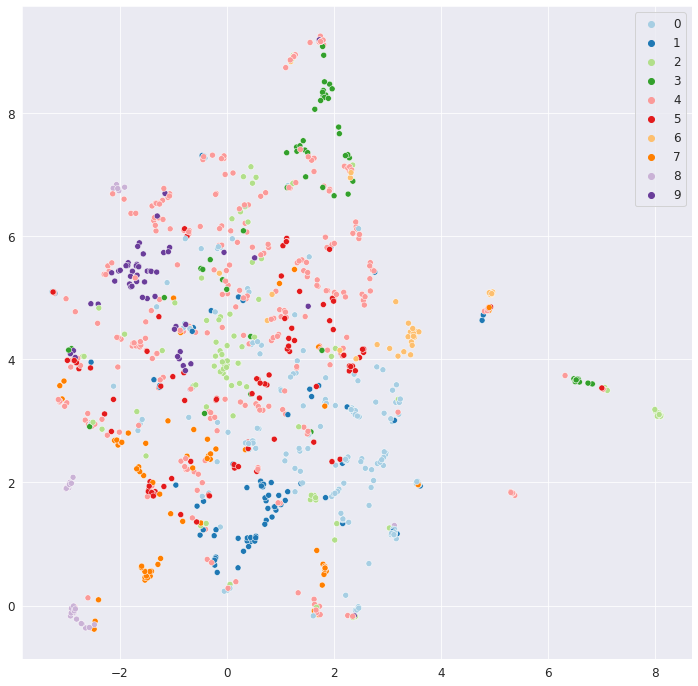

In [380]:
# Plotting things
sns.set_style("darkgrid")

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(12,12))
g = sns.scatterplot(*embeddings.T,
                    #reduced[:,0],reduced[:,1],
                   hue=clusterer.labels_,
                    palette="Paired",
                   legend='full')

In [381]:
# Let's explore the clusters ... that should actually correlate with topics found by LDA
reports_reduc['cluster'] = clusterer.labels_

In [382]:
reports_reduc[reports_reduc['cluster'] == 2]['tweets']

2      As long as I am President, I will always stand...
11     Congratulations to Armenian Prime Minister Nik...
26     Pennsylvania Trump Voters Show Passion: ‘He‘s ...
28     Trump Predicts 35% Growth in Q3 -- ‘We‘re Comi...
29     ....to be around to vote for President Trump.”...
                             ...                        
958    “His (President Trump’s) policies set a founda...
960    Jim Banks: New York Times Damaged National Sec...
978    “I often get asked the question, well, isn’t t...
985    Twitter makes sure that Trending on Twitter is...
996    I was honored to be back in Georgia with a tru...
Name: tweets, Length: 98, dtype: object

In [310]:
from gensim.matutils import corpus2dense

In [383]:
# Let's check out the topics by getting "top-tfidf" for the different clusters (and we need to transponse)
tfidf_matrix = corpus2dense(tfidf_corpus, len(dictionary)).T

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:502: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for docno, doc in enumerate(corpus):


In [384]:
# write cluster-numbers into our data
reports_reduc['cluster'] = clusterer.labels_

In [385]:
# Get indices to subset the matrix
cluster_index = reports_reduc[reports_reduc['cluster'] == 2].index

In [386]:
tfidf_matrix[cluster_index,:].shape

(98, 421)

In [387]:
# Use numpy to sum up columns for tfidf, get the indices of the sorted values, and flip (descending), and only top 10
topk = np.flip(np.argsort(np.sum(tfidf_matrix[cluster_index,:], axis=0)))[:10]

In [388]:
# Use dictionary to get the words from indices
[dictionary[x] for x in topk]

['president',
 'trump',
 'mini',
 'mike',
 'bloomberg',
 'donald',
 'america',
 'debate',
 'new',
 'year']

In [389]:
# Let's loop it

for i in set(clusterer.labels_):
  cluster_index = reports_reduc[reports_reduc['cluster'] == i].index
  topk = np.flip(np.argsort(np.sum(tfidf_matrix[cluster_index,:], axis=0)))[:10]

  print(str(i) + str([dictionary[x] for x in topk]))

0['great', 'country', 'american', 'year', 'americans', 'america', 'family', 'national', 'life', 'small']
1['biden', 'joe', 'sleepy', 'vote', 'left', 'american', 'fracking', 'pennsylvania', 'ban', 'corrupt']
2['president', 'trump', 'mini', 'mike', 'bloomberg', 'donald', 'america', 'debate', 'new', 'year']
3['impeachment', 'hoax', 'bernie', 'trial', 'sanders', 'partisan', 'senate', 'democrat', 'democrats', 'crazy']
4['amp', 'democrats', 'house', 'big', 'new', 'coronavirus', 'strong', 'congress', 'china', 'money']
5['people', 'election', 'ballot', 'administration', 'political', 'obama', 'great', 'guy', 'number', 'fraud']
6['states', 'united', 'supreme', 'court', 'world', 'president', 'attack', 'iran', 'law', 'life']
7['state', 'north', 'carolina', 'governor', 'great', 'texas', 'ballot', 'mail', 'democrat', 'pennsylvania']
8['federal', 'm', 'government', 'fund', 'reserve', 'proud', 'competitor', 'infrastructure', 'area', 'county']
9['news', 'fake', 'medium', 'campaign', 'media', 'story', '